Solving Differential Non-Linear <font color = 'cyan'>Reaction-Diffusion</font> equation with Newton method

$
\Delta u + u^3 - \lambda u = 0
$


The equation is typically used for modeling:

 - Phase Transitions (Physics)
 - Capturing Turing patterns like stripes or spots in developmental biology
 - Modeling spatial distribution of populations with nonlinear feedback mechanisms


In [2]:
import numpy as np, datetime
from matplotlib import pyplot as plt
from matplotlib import cm

In [3]:
"""
Parameters 
"""

lambda_    = 0.8       # Equation parameter

L          = 1.0       # 1D Domain length
Np         = 2000      # Number of discretization points
dx         = L/(Np-1)  # Spatial step 

newton_eps = 1e-6      # Convergence tolerance
maxiter    = 20        # Maximum newton iterations

u_L        = 1.0       # Boundary condition u(0)
u_R        = 1.0       # Boundary condition u(L)

In [4]:
"""
Arrays initialization
"""

u = np.linspace(0, 1, Np)           # Initial guess is just linear function

conv_hist = [ ]                     # Convergence history
u_hist    = [ u ]                   # Function history

Discretizing the equation <i>(1st order consistent finite difference):</i>

$
\frac{u_{i+1} - 2u_i + u_{i-1}}{\Delta x^2} + u_i^3 - \lambda u_i = 0
$


Discrete "Jacobian" of the differential operator F(u) = 0:

$
J_{ij} =
\begin{cases} 
\frac{1}{\Delta x^2}, & j = i-1 \\
-\frac{2}{\Delta x^2} + 3u_i^2 - \lambda, & j = i \\
\frac{1}{\Delta x^2}, & j = i+1 \\
0, & \text{otherwise}.
\end{cases}
$


In [5]:
for i in range(maxiter):
    J  = np.eye(Np)*(-2)

    # Filling secondary diagonals
    J += np.diag(np.ones(Np-1), k = -1)     
    J += np.diag(np.ones(Np-1), k =  1)

    J /= dx**2

    J += np.diag(3*u**2, k = 0)
    J -= np.diag(np.ones(Np)*lambda_, k = 0)

    # Setting Dirichlet boundary conditions
    J[0,  :] = 0.0
    J[-1, :] = 0.0
    J[0,  0] = 1.0
    J[-1,-1] = 1.0

    # Computing residual F(u_k) for the current step
    d2u_dx2     = (np.roll(u, -1) - 2 * u + np.roll(u, 1)) / dx**2
    d2u_dx2[0]  = 0.0 
    d2u_dx2[-1] = 0.0
    resid       = d2u_dx2 + u**3 - lambda_ * u

    resid[0]    = u[0]  - u_L
    resid[-1]   = u[-1] - u_R

    # Check convergence
    res_norm = np.linalg.norm(resid, ord=2)
    print(f'{str(datetime.datetime.now())[:-7]}  |  Iter {i}  |  Residual norm: {res_norm:.4e}')
    conv_hist.append(res_norm)
    if (res_norm <= newton_eps):
        print('-'*80)
        print(f'Converged')
        break

    # Iterative update
    delta_u = np.linalg.solve(J, -resid)

    u = u + delta_u 

    u_hist.append(u.copy())

2024-11-21 18:53:50  |  Iter 0  |  Residual norm: 8.5630e+00
2024-11-21 18:53:50  |  Iter 1  |  Residual norm: 2.4619e+01
2024-11-21 18:53:50  |  Iter 2  |  Residual norm: 4.0625e-01
2024-11-21 18:53:50  |  Iter 3  |  Residual norm: 2.3439e-04
2024-11-21 18:53:50  |  Iter 4  |  Residual norm: 2.7991e-08
--------------------------------------------------------------------------------
Converged


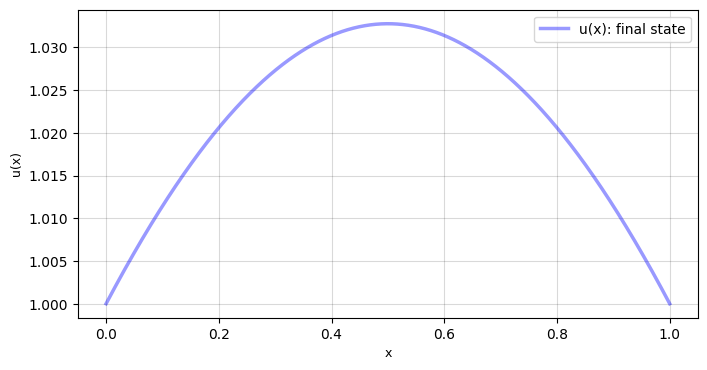

In [6]:
plt.figure(figsize = (8,4))
plt.plot(np.linspace(0.0, L, Np), u, lw = 2.5, color = 'blue', alpha = 0.4)
plt.grid(color = 'black', alpha = 0.15)
plt.xlabel('x', fontsize = 9)
plt.ylabel('u(x)', fontsize = 9)
plt.legend(['u(x): final state'], fontsize = 10)
plt.show()

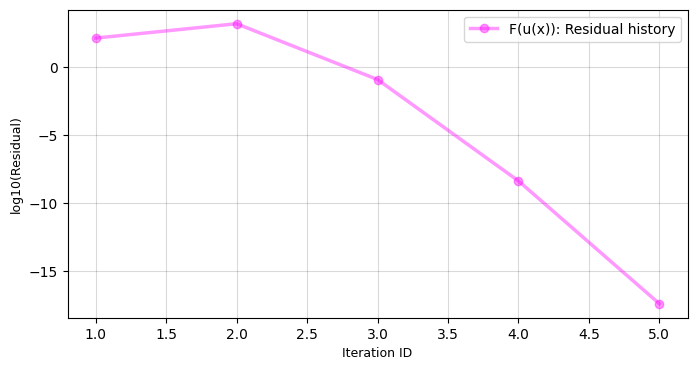

In [7]:
plt.figure(figsize = (8,4))
plt.plot(np.arange(1, len(u_hist)+1), np.log(conv_hist), lw = 2.5, color = 'magenta', alpha = 0.4, marker = 'o')
plt.grid(color = 'black', alpha = 0.15)
plt.xlabel('Iteration ID', fontsize = 9)
plt.ylabel('log10(Residual)', fontsize = 9)
plt.legend(['F(u(x)): Residual history'], fontsize = 10)
plt.show()